### Задача
Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов (описание данных), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import warnings
import statistics
warnings.filterwarnings("ignore")

%matplotlib inline

In [476]:

features = ['target','Alcohol','Malic acid','Ash','Alcalinity of ash',\
            'Magnesium','Total phenols','Flavanoids',\
            'Nonflavanoid phenols','Proanthocyanins','Color intensity', \
            'Hue','OD280/OD315 of diluted wines','Proline']

data = pd.read_table(filepath_or_buffer = \
                     'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', sep=',', names = features)


In [477]:
fixed_data = data.drop(labels = 'target', axis = 1, inplace = False)
fixed_data['target'] = data['target']

In [478]:
fixed_data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


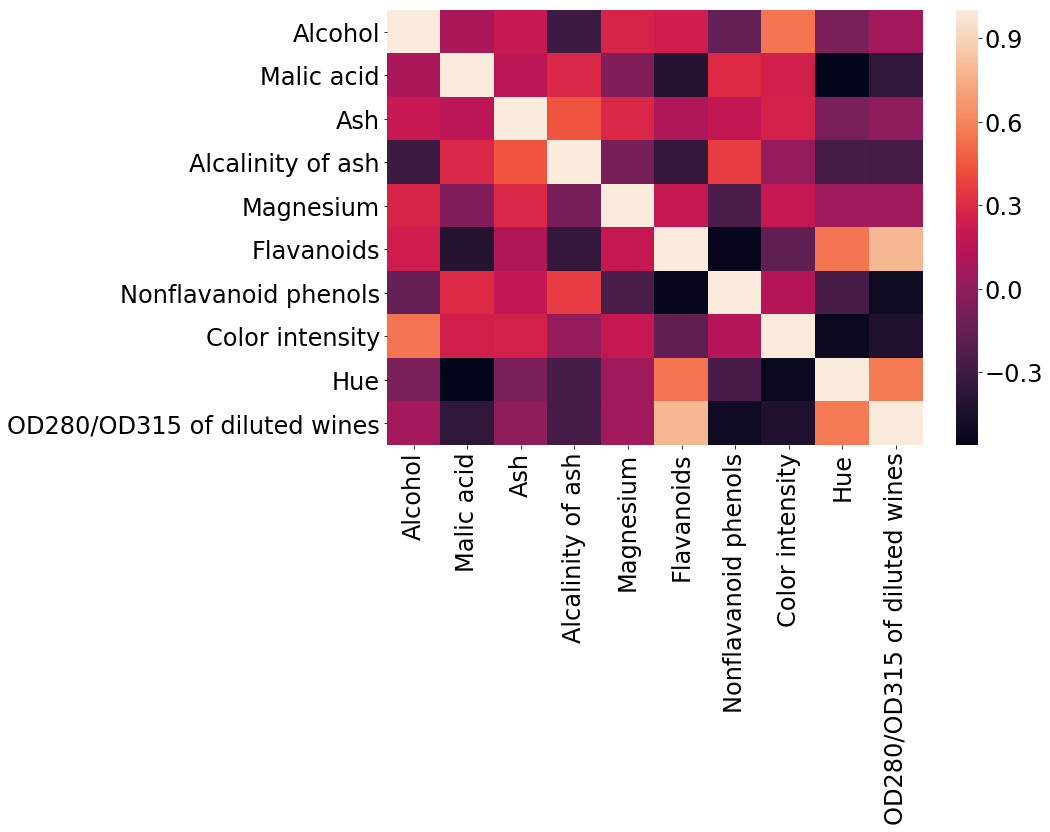

In [491]:
corr_matrix = fixed_data.drop('target', axis = 1).corr()
most_corr_features = []
sns.heatmap(corr_matrix);

for x in corr_matrix:
    most_corr_features.append(max(corr_matrix))
    corr_matrix.drop(max(corr_matrix), axis = 1, inplace=True)

Удалим три наиболее коррелирующих с другими признака

In [480]:
fixed_data.drop(most_corr_features[:3], axis = 1, inplace = True)

In [481]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [482]:
X_train, X_test, y_train, y_test = train_test_split(fixed_data.drop(labels='target', axis = 1), fixed_data['target'])

In [483]:
rcParams['font.family'] = 'serif'

rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize'] = 12, 8


### manhattan

In [484]:
knn_train_result_manh = []
knn_test_result_manh  = []
error_manh  = []
std_score_manh  = []
for neighbours in neighbours_factor:
    knn = KNeighborsClassifier(n_neighbors=neighbours, metric='manhattan').fit(X_train, y_train)
    knn_train_result_manh.append(knn.score(X_train, y_train))
    knn_test_result_manh.append(knn.score(X_test, y_test))
    error_manh.append((knn.predict(X_test) != y_test).sum())
    std_score_manh.append((knn.predict(X_test) != y_test).std())


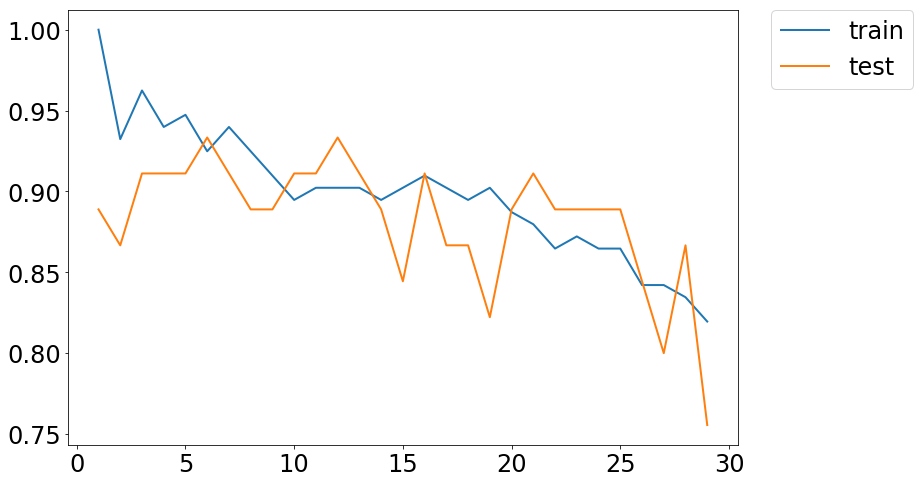

In [485]:
plt.plot(neighbours_factor, knn_train_result_manh, label='train');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.plot(neighbours_factor, knn_test_result_manh, label='test');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### EUCLIDEAN

In [486]:
knn_train_result_eucl = []
knn_test_result_eucl = []
error_eucl = []
std_score_eucl = []
for neighbours in neighbours_factor:
    knn = KNeighborsClassifier(n_neighbors=neighbours, metric='euclidean').fit(X_train, y_train)
    knn_train_result_eucl.append(knn.score(X_train, y_train))
    knn_test_result_eucl.append(knn.score(X_test, y_test))
    error_eucl.append((knn.predict(X_test) != y_test).sum())
    std_score_eucl.append((knn.predict(X_test) != y_test).std())


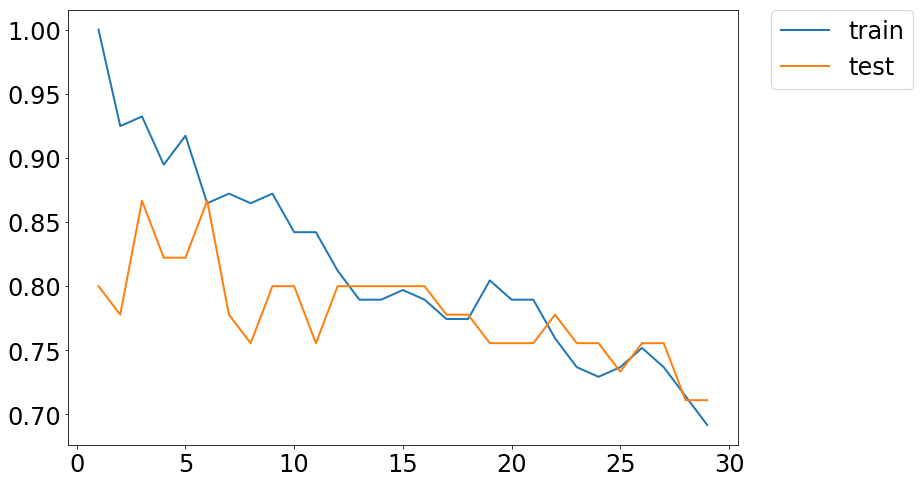

In [487]:
plt.plot(neighbours_factor, knn_train_result_eucl, label='train');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.plot(neighbours_factor, knn_test_result_eucl, label='test');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### CHEBYSHEV

In [488]:
knn_train_result_cheb = []
knn_test_result_cheb = []
error_cheb = []
std_score_cheb = []
for neighbours in neighbours_factor:
    knn = KNeighborsClassifier(n_neighbors=neighbours, metric='chebyshev').fit(X_train, y_train)
    knn_train_result_cheb.append(knn.score(X_train, y_train))
    knn_test_result_cheb.append(knn.score(X_test, y_test))
    error_cheb.append((knn.predict(X_test) != y_test).sum())
    std_score_cheb.append((knn.predict(X_test) != y_test).std())


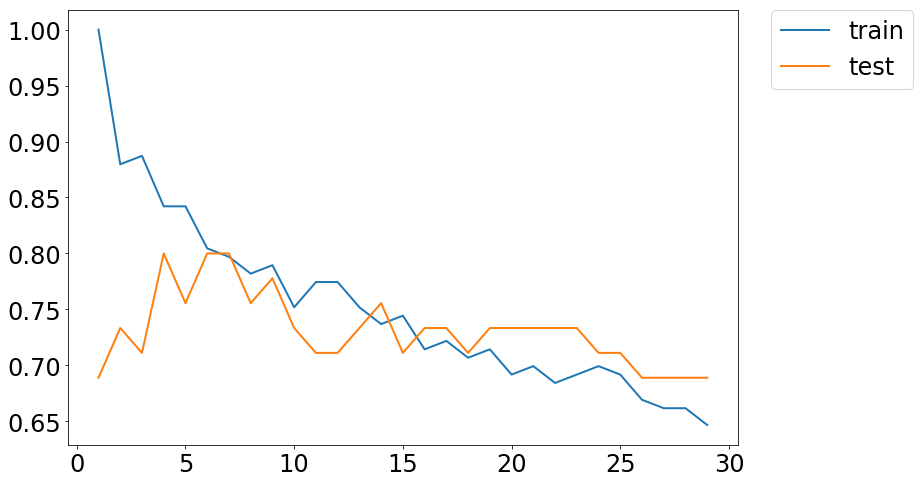

In [489]:
plt.plot(neighbours_factor, knn_train_result_cheb, label='train');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.plot(neighbours_factor, knn_test_result_cheb, label='test');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### ERRORS + STD

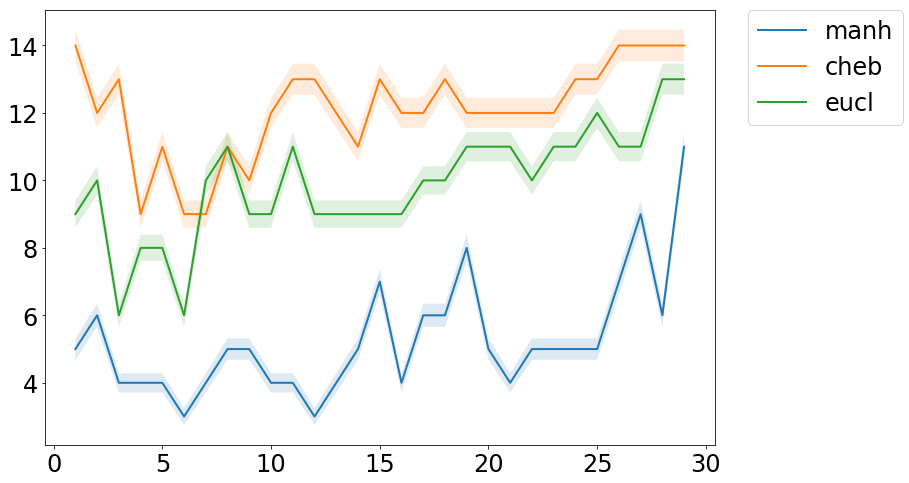

In [490]:

plt.plot(neighbours_factor, error_manh, label = 'manh');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.fill_between(neighbours_factor,np.array(error_manh) - np.array(std_score_manh), np.array(error_manh) + np.array(std_score_manh), alpha=0.15);

plt.plot(neighbours_factor, error_cheb, label = 'cheb');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.fill_between(neighbours_factor,np.array(error_cheb) - np.array(std_score_cheb), np.array(error_cheb) + np.array(std_score_cheb), alpha=0.15);


plt.plot(neighbours_factor, error_eucl, label = 'eucl');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.fill_between(neighbours_factor, np.array(error_eucl) - np.array(std_score_eucl), np.array(error_eucl) + np.array(std_score_eucl), alpha=0.15);

